# *Importing the libraries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# *Loading the data*

In [ ]:
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
#print(iris.target_names) # 0 : setosa, 1 : versicolor, 2 : virginica
df['target'] = iris.target
df['class_name'] = df['target'].map({0 : 'setosa', 1 : 'versicolor', 2: 'virginica'})
df

# *Data Visualization*

In [ ]:
df2 = df.drop('target', axis = 1)
custom_palette = {'setosa' : 'orange', 'versicolor' : 'blue', 'virginica' : 'green'}
sns.pairplot(df2, hue = 'class_name', palette = custom_palette)
plt.show()

In [ ]:
sns.heatmap(df2.corr(), cmap = 'coolwarm', annot = True)

# *Standaradization and Model Training*

In [ ]:
X = df.drop(columns = ['target', 'class_name'])
y = df['target']
scaler = StandardScaler()
x = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# *Evaluation of the model*

In [ ]:
acc_score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names = ['Setosa', 'Versicolor', 'Virginica'])
print(f"Accuracy score of the model : {acc_score:.02f}")
print(f"\nConfusion Matrix : \n{conf_matrix}")
print(f"\nClassification Report :\n{report}")

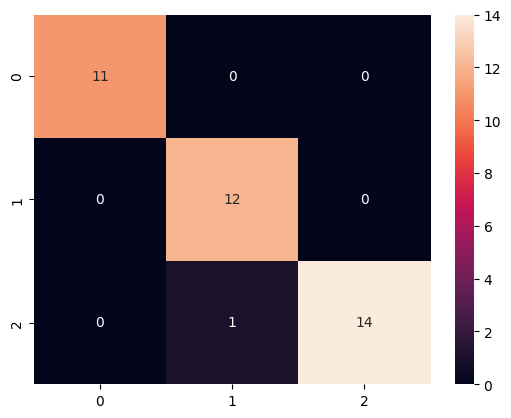

In [29]:
sns.heatmap(conf_matrix, annot = True)
plt.show()